### 一元线性回归的梯度下降

下面使用梯度下降算法来求解前面的线性回归问题，我们知道，对一元线性回归，损失函数为：

$$
loss = J(a, b) = \frac{1}{2m} \sum_{i=1}^{m}(y_i - (ax_i + b))^2
$$

这是一个二元二次方程，我们对该方程求梯度，也就是分别对参数 a 和 b 求偏导，得到参数的更新公式：

$$
\begin{align}
a &:= a - \eta \frac{\partial J(a, b)}{\partial a} \\
b &:= b - \eta \frac{\partial J(a, b)}{\partial b} \\
\end{align}
$$

将损失函数带入上式求导，得到：

$$
\begin{align}
a &:= a - \eta \frac{1}{m} \sum_{i=1}^{m}(y_i - (ax_i + b))x_i \\
b &:= b - \eta \frac{1}{m} \sum_{i=1}^{m}(y_i - (ax_i + b))
\end{align}
$$

我们使用代码来实现这个过程，先来看一个最简单的例子，手工造几个散点，然后使用梯度下降法来求解线性回归。如下所示：

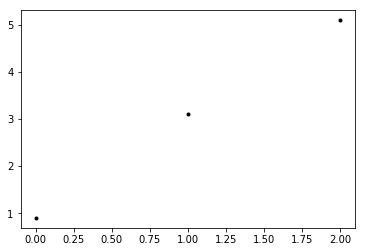

In [54]:
import matplotlib.pyplot as plt

X = np.array([0,1,2])
Y = np.array([0.9, 3.1, 5.1])

plt.plot(X, Y, 'k.')
plt.show()

很显然这是一个一元线性回归，根据上面的介绍，我们可以定义出损失函数和参数 a, b 的更新公式：

In [57]:
# 损失函数
def loss(X, Y, a, b):
    s = 0
    for i in range(X.size):
        s += ((a*X[i] + b)-Y[i])**2
    return s

# 参数 a 的更新公式
def update_a(X, Y, a, b, eta):
    s = 0
    for i in range(X.size):
        s += ((a*X[i] + b)-Y[i])*X[i]
    return a - eta * s

# 参数 b 的更新公式
def update_b(X, Y, a, b, eta):
    s = 0
    for i in range(X.size):
        s += ((a*X[i] + b)-Y[i])
    return a - eta * s

我们选取参数的初始值 $(a, b) = (0, 0)$，并令学习率 $\eta = 0.01$，然后进行第一次迭代，并计算损失函数的值和上次损失函数的值之间的差值（这个差值可以用于判断梯度下降过程是否已经收敛，如果两次损失函数的差值足够小，就认为收敛）：

In [69]:
a = 0
b = 0
eta = 0.01

a_new = update_a(X, Y, a, b, eta)
b_new = update_b(X, Y, a, b, eta)
loss_new = loss(X, Y, a_new, b_new)
diff = abs(loss(X, Y, a, b) - loss(X, Y, a_new, b_new))
print("a = {0}, b = {1}, loss = {2}, diff = {3}".format(a_new, b_new, loss_new, diff))

a = 0.13299999999999998, b = 0.091, loss = 31.421906, diff = 5.008094


我们不妨画出迭代一次后的图像，很显然，这个差值还比较大，我们需要继续这个过程：

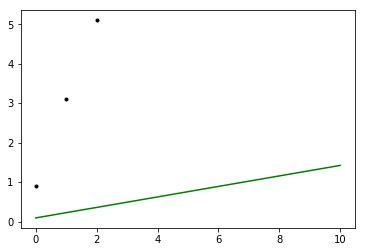

In [65]:
plt.plot(X, Y, 'k.')

x = np.linspace(0, 10, 10)
y = a_new*x+b_new

plt.plot(x, y, 'g-')
plt.show()

我们把这个过程改为迭代 10 次：

In [70]:
for i in range(10):
    a_new = update_a(X, Y, a, b, eta)
    b_new = update_b(X, Y, a, b, eta)
    loss_new = loss(X, Y, a_new, b_new)
    diff = abs(loss(X, Y, a, b) - loss(X, Y, a_new, b_new))
    print("a = {0}, b = {1}, loss = {2}, diff = {3}".format(a_new, b_new, loss_new, diff))
    a = a_new
    b = b_new

a = 0.13299999999999998, b = 0.091, loss = 31.421906, diff = 5.008094
a = 0.25661999999999996, b = 0.21727999999999997, loss = 26.454863278799994, diff = 4.967042721200006
a = 0.37027059999999995, b = 0.33340299999999995, loss = 22.272537680459603, diff = 4.182325598340391
a = 0.47475497999999994, b = 0.44016039199999996, loss = 18.752593393435298, diff = 3.5199442870243054
a = 0.5708124192399999, b = 0.5383075188399999, loss = 15.791287552384992, diff = 2.961305841050306
a = 0.6591225727128, b = 0.6285388210976, loss = 13.301033748911504, diff = 2.490253803473488
a = 0.740310279444232, b = 0.711492730898488, loss = 11.207893426653094, diff = 2.09314032225841
a = 0.8149499835450658, b = 0.7877561891339504, loss = 9.449455974653821, diff = 1.7584374519992725
a = 0.8835697986937939, b = 0.8578687983646953, loss = 7.973047564810326, diff = 1.4764084098434953
a = 0.9466552448081633, b = 0.9223266407820393, loss = 6.734217796908273, diff = 1.238829767902053


可以看到 loss 和 diff 都变得越来越小，说明损失函数在不断收敛，画出现在的图像：

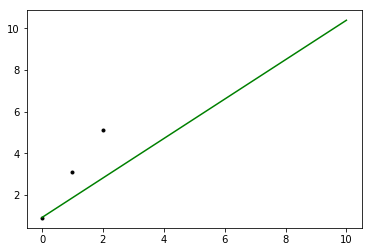

In [71]:
plt.plot(X, Y, 'k.')

x = np.linspace(0, 10, 10)
y = a_new*x+b_new

plt.plot(x, y, 'g-')
plt.show()

比迭代一次靠谱多了，我们再继续这个过程，迭代 1000 次：

In [73]:
for i in range(1000):
    a_new = update_a(X, Y, a, b, eta)
    b_new = update_b(X, Y, a, b, eta)
    loss_new = loss(X, Y, a_new, b_new)
    diff = abs(loss(X, Y, a, b) - loss(X, Y, a_new, b_new))
    a = a_new
    b = b_new
    
print("a = {0}, b = {1}, loss = {2}, diff = {3}".format(a_new, b_new, loss_new, diff))

a = 1.6657568238213385, b = 1.6570719602977653, loss = 0.6352237868590999, diff = 0.0


diff 的值已经是 0.00，说明已经达到收敛，这个时候的图形，就是我们根据梯度下降法求得的结果：

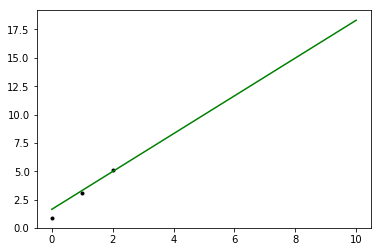

In [74]:
plt.plot(X, Y, 'k.')

x = np.linspace(0, 10, 10)
y = a_new*x+b_new

plt.plot(x, y, 'g-')
plt.show()

### 多元线性回归的梯度下降

上面是对一元线性回归的梯度下降法的介绍，回到线性回归的一般形式：

$$
\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n = \theta^Tx
$$

其对应的损失函数为：

$$
loss = J(\theta_0, \theta_1, \dots, \theta_n) = J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(y^{(i)} - \theta^Tx^{(i)})^2
$$

对 $J(\theta)$ 进行求导，得到参数 $\theta$ 的更新公式：

$$
\left\{
\begin{align}
\theta_0 &:= \theta_0 - \eta \frac{1}{m} \sum_{i=1}^{m}(y^{(i)} - \theta^Tx^{(i)})x_0^{(i)} \\
\theta_1 &:= \theta_1 - \eta \frac{1}{m} \sum_{i=1}^{m}(y^{(i)} - \theta^Tx^{(i)})x_1^{(i)} \\
\theta_2 &:= \theta_2 - \eta \frac{1}{m} \sum_{i=1}^{m}(y^{(i)} - \theta^Tx^{(i)})x_2^{(i)} \\
\vdots \\
\theta_n &:= \theta_n - \eta \frac{1}{m} \sum_{i=1}^{m}(y^{(i)} - \theta^Tx^{(i)})x_n^{(i)} \\
\end{align}
\right.
$$

其中，$m$ 表示样本个数，$n$ 表示特征维度，$x^{(i)}$ 表示第 i 个样本，$x^{(i)}_n$ 表示第 i 个样本的第 n 个特征。
为了方便表达和计算，损失函数也可以写成下面的矩阵形式：

$$
loss = J(\theta) = \frac{1}{2m} (\bf{y}-\rm{X}\theta)^T (\bf{y}-\rm{X}\theta)
$$

根据前面的矩阵求导，得到梯度下降的更新公式为：

$$
\begin{aligned}
\theta &:= \theta - \eta \frac{\partial}{\partial\theta}J(\theta) \\
       &= \theta - \eta \frac{1}{m} X^T(\bf{y}-\rm{X}\theta)
\end{aligned}
$$

TODO：使用矩阵的迹（Trace）求矩阵导数。

TODO: 这里应该是 $\bf{y}-\rm{X}\theta$ 还是 $\rm{X}\theta-\bf{y}$ ？

我们把上面的代码改成矩阵计算的形式：

theta: 0.9333333336908441 2.099999999742321
loss: [[0.01]]


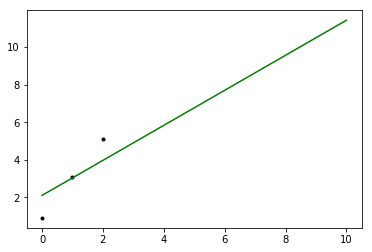

In [38]:
import numpy as np

# 计算损失函数 J 的梯度
def gradient_function(theta, X, y):
    diff = np.dot(X, theta) - y
    return (1./m) * np.dot(np.transpose(X), diff)

# 梯度下降
def gradient_descent(X, y, eta, theta_init):
    theta = theta_init
    gradient = gradient_function(theta, X, y)
    while not np.all(np.absolute(gradient) <= 1e-10):
        theta = theta - eta * gradient
        gradient = gradient_function(theta, X, y)
    return theta

# 损失函数
def loss_function(theta, X, y):
    diff = np.dot(X, theta) - y
    return (1./2*m) * np.dot(np.transpose(diff), diff)

# 数据集
X0 = np.ones((3, 1))
X1 = np.array([0,1,2]).reshape(-1, 1)
X = np.hstack((X0, X1))
y = np.array([0.9, 3.1, 5.1]).reshape(-1, 1)

# 学习率
eta = 0.01

# 初始值
theta_init = np.array([1, 1]).reshape(-1, 1)

# 使用梯度下降求解线性回归
theta = gradient_descent(X, y, eta, theta_init)
print('theta:', theta[0,0], theta[1,0])
print('loss:', loss_function(theta, X, y))

# 绘制图形
plt.plot(X1, y, 'k.')
x = np.linspace(0, 10, 10)
y = theta[0,0]*x+theta[1,0]
plt.plot(x, y, 'g-')
plt.show()

### sklearn 中的梯度下降法

上面的求解过程中，我们每次的迭代都用到了所有样本，这样做可以让收敛速度最快，但是如果样本数非常多，计算性能就会变低，上面的例子中一共也就3个样本，所以不明显。像这种每次迭代都使用全部样本的方法，叫做 **批量梯度下降**（Batch gradient descend，BGD）。为了提高计算性能，可以在每次迭代中随机选取一个样本（或部分样本）用于计算，这样也可以保证收敛，虽然收敛的速度慢了点，但计算快很多，而且可以有效的避免陷入局部极小值情况。这种方法叫做 **随机梯度下降**（Stochastic gradient descend，SGD）。

sklearn 中的 `SGDRegressor` 实现的就是随机梯度下降算法。

a = 1.5406240083798064, b = 1.0052519491961363


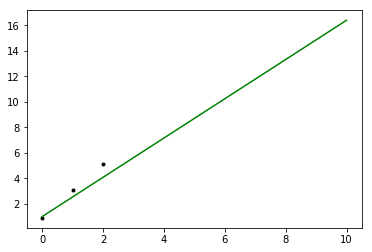

In [75]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

X = np.array([0,1,2])
Y = np.array([0.9, 3.1, 5.1])
#X = np.array([39.93, 42.05, 43.18])
#Y = np.array([199,   290,   298])

model = SGDRegressor(max_iter=1000, tol=0.01)
model.fit(X.reshape(-1,1), Y.ravel())

plt.plot(X, Y, 'k.')

x = [[0],[10]]
#x = [[30],[60]]
y = model.predict(x)

b = y[0]
a = (y[1]-b)/x[1][0]
print("a = {0}, b = {1}".format(a, b))

plt.plot(x, y, 'g-')
plt.show()

### 疑惑

在前面介绍正规方程法解一元线性回归时，使用了下面的数据集，这个数据集不知道为什么用梯度下降法无法收敛？

```
X = np.array([39.93, 42.05, 43.18, 44.68, 49.87, 53.57])
Y = np.array([199,   290,   298,   310,   399,   420])
```

### 标准化和归一化

在实际的运用中我们选取的特征，比如长度，重量，面积等等，通常单位和范围都不同，这会导致梯度下降算法变慢，所以我们要将特征缩放到相对统一的范围内。通常的方法有 **标准化（Standardization）** 和 **归一化（Normalization）**。

标准化是把数据变成符合标准的正态分布，由 **中心极限定理** 可知，当数据量足够大时，无论原来的数据是何种分布，都可以通过下面的更新公式转变成正态分布：

$$
x_i := \frac{x_i-\mu}{\delta}
$$

归一化对梯度下降算法很友好，可以让算法最终收敛并且提高训练速度和精度，归一化的更新公式为：

$$
x_i := \frac{x_i-min(x_i)}{max(x_i)-min(x_i)}
$$